# **Divnoising**
---

<font size = 4> DivNoising - a denoising approach based on fully-convolutional variational autoencoders, overcoming this problem by predicting a whole distribution of denoised images. The method is unsupervised, requiring only noisy images and a description of the imaging noise, which can be measured or bootstrapped from noisy data. If desired, consensus predictions can be inferred from a set of DivNoising predictions, leading to competitive results with other unsupervised methods and, on occasion, even with the supervised state-of-the-art. Published by [Mangal Prakash, Alexander Krull and Florian Jug](https://openreview.net/pdf?id=agHLCOBM5jP)

# **How to use this notebook?**

---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4** and **section 5** to run predictions using the model that you trained.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to run the predictions on the desired model.

# **1. Complete the Colab session**




---






In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.** 


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>


## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [ ]:
#@markdown ##Run this cell to check if you have GPU access
import tensorflow as tf

if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

# from tensorflow.python.client import device_lib 
# device_lib.list_local_devices()

# print the tensorflow version
print('Tensorflow version is ' + str(tf.__version__))


You have GPU access
Mon Jul 11 20:49:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |    264MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

#**2. INSTALL DEPENDENCIES**#
---

In [ ]:
!git clone https://github.com/juglab/DivNoising/
!cd DivNoising
!conda env create -f DivNoising.yml
!conda activate DivNoising
!conda install -c conda-forge tensorboard
!pip install -U jupyter protobuf
!pip install ipykernel
!python -m ipykernel install --user --name DivNoising --display-name 'DivNoising'
!cd ..
#exit(0)

Cloning into 'DivNoising'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 91 (delta 22), reused 19 (delta 19), pack-reused 61
Unpacking objects: 100% (91/91), done.
/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 33.2 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.2 which is incompatible.
tenso

In [ ]:
"""
import requests

def download_file_from_google_drive(id, destination, url):
    URL = url

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

 

file_id = 'https://drive.google.com/file/d/1JNo9x_eDs5AYY8sHyQ6MZcs210qOTZgQ'
url = "https://drive.google.com/uc?export=download&id=1JNo9x_eDs5AYY8sHyQ6MZcs210qOTZgQ"
!mkdir ./resources
destination = './resources/divnoising.zip'
download_file_from_google_drive(file_id, destination, url)
!unzip ./resources/divnoising.zip -d ./divnoising

file_id = 'https://drive.google.com/file/d/1YiHy19kOjwEpmUqZWpd9kbbJg9bVKshM'
url = "https://drive.google.com/uc?export=download&id=1YiHy19kOjwEpmUqZWpd9kbbJg9bVKshM"
destination = './resources/nets.zip'
download_file_from_google_drive(file_id, destination, url)
!unzip ./resources/nets.zip -d ./divnoising
"""

'\nimport requests\n\ndef download_file_from_google_drive(id, destination, url):\n    URL = url\n\n    session = requests.Session()\n\n    response = session.get(URL, params = { \'id\' : id }, stream = True)\n    token = get_confirm_token(response)\n\n    if token:\n        params = { \'id\' : id, \'confirm\' : token }\n        response = session.get(URL, params = params, stream = True)\n\n    save_response_content(response, destination)    \n\ndef get_confirm_token(response):\n    for key, value in response.cookies.items():\n        if key.startswith(\'download_warning\'):\n            return value\n\n    return None\n\ndef save_response_content(response, destination):\n    CHUNK_SIZE = 32768\n\n    with open(destination, "wb") as f:\n        for chunk in response.iter_content(CHUNK_SIZE):\n            if chunk: # filter out keep-alive new chunks\n                f.write(chunk)\n\n \n\nfile_id = \'https://drive.google.com/file/d/1JNo9x_eDs5AYY8sHyQ6MZcs210qOTZgQ\'\nurl = "https://driv

<font size = 5> **Paths for data**

<font size = 4>**`Resources_path`**: This is the path where you have the folder where divnoising .py files are. The libraries you need to download in order to run the notebook

In [ ]:
import sys
Resources_path = './DivNoising'
sys.path.append(Resources_path)

#Install all dependencies and libraries


!pip install bm3d
!pip install tifftools
!pip install tifffile
!pip install pytorch_lightning
!sudo pip --yes uninstall scikit-learn
!sudo pip install scikit-learn==0.23.2

!sudo pip --yes uninstall tensorboard
!pip install tensorboard==2.4.1

!sudo pip --yes uninstall tensorboard-plugin-wit
!pip install tensorboard-plugin-wit==1.8.0

!pip3 install -q h5py==2.10.0

!pip install -q n2v

!pip install -q fpdf
!pip install -q memory_profiler

#!sudo pip --yes uninstall torch
#!pip install torch==1.8.1

#!sudo pip --yes uninstall torchmetrics
#!pip install torchmetrics==0.2.0


from PIL import Image, ImageSequence, TiffImagePlugin
from bm3d import bm3d, BM3DProfile
import tifftools
import tifffile


import warnings
import gc
warnings.filterwarnings('ignore')
import torch
import os
import urllib
import zipfile
from torch.distributions import normal
import matplotlib.pyplot as plt, numpy as np, pickle
from scipy.stats import norm
from tifffile import imread
sys.path.append('../../')
from divnoising.gaussianMixtureNoiseModel import GaussianMixtureNoiseModel
from divnoising import histNoiseModel
from divnoising import utils, training
from divnoising.utils import plotProbabilityDistribution
from glob import glob
from nets import lightningmodel
import pandas as pd
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess



dtype = torch.float
device = torch.device("cuda:0")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 12.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 5.4 MB/s 
  Created wheel for tifftools: filename=tifftools-1.3.4-py3-none-any.whl size=53609 sha256=a1939e433ae6e2ca0a22dabaec6f2ae0196bc6488ba58ab023115e6bd214b17b
  Stored in directory: /root/.cache/pip/wheels/82/e0/34/b140956591816ad7903d3ddccfd042636fa070fa33c2039f73
Successfully built tifftools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 12.7 MB/s 
     |████████████████████████████████| 419 kB 50.8 MB/s 
     |████████████████████████████████| 140 kB 55.4 MB/s 
     |██████████████████


Usage:   
  pip3 <command> [options]

no such option: --yes
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 25.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.

Usage:   
  pip3 <command> [options]

no such option: --yes
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.6 MB 20.1 MB/s 
  


Usage:   
  pip3 <command> [options]

no such option: --yes
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 781 kB 22.2 MB/s 
  Attempting uninstall: tensorboard-plugin-wit
    Found existing installation: tensorboard-plugin-wit 1.8.1
    Uninstalling tensorboard-plugin-wit-1.8.1:
      Successfully uninstalled tensorboard-plugin-wit-1.8.1
     |████████████████████████████████| 2.9 MB 30.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.4.1 which is incompatible.
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |█████████████████████

#**3.GENERATING NOISE MODEL**

<font size = 5> **Paths for training data**

<font size = 4>**`Test_Data`**: If checked demo images will be downloaded

<font size = 4>**`Images_source`**: This is the path where you have the images you want to use to train the model. The images will be all in a single .tif file.

<font size = 4>**`dataName`**: This is the name under which the generated files will be saved.

In [ ]:
#@markdown ##Noisy Images Path
%%capture
Test_Data = False#@param {type:"boolean"}

if Test_Data:
  !mkdir ./data
  !wget -O ./data/example2_digital_offset300.tif https://www.dropbox.com/s/6d54oq9hlb3qf9u/example2_digital_offset300.tif?dl=0
  Images_source = "./data/example2_digital_offset300.tif"

else:
  Images_source = "/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/convallaria/dataset/20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif" #@param {type:"string"}
  

dataName = "convalaria" #@param {type:"string"}

def getFolder(p):
  
  aux = ""
  ps = p.split("/")
  
  for i in range(len(ps)-1):
    aux = aux + ps[i]
    aux = aux + "/"
  return aux

def howManyImages(i):

  x = 0
  for i, page in enumerate(ImageSequence.Iterator(i)):
    x = x + 1
  return x

<font size = 5> **Paths for Noise Model and Parameters**

<font size = 4>**`Trained_Noise_Model`**: Check this option if you want to use a pre-trained NoiseModel 

<font size = 4>**`Noise_Model_Source`**: If is the case, this is the path where you have the noise model.

<font size = 4>**`percentage_images_for_training`**:percentage of images to be used to create the noise model (using many images improves the result but increases the execution time a lot).

<font size = 4>**`Create_From_Image`**: If you check this option, they will use the training images to create the noise model.

<font size = 4>**`Use_Calibration_Images`**:Use calibration images to generate the noise model, (microscope images without sample).

<font size = 4>**`Calibration_source`**: This is the path to the calibration images (.tif file)

In [ ]:

#@markdown ##Noise model options:
#@markdown ####Trained Noise model:
Trained_Noise_Model = True #@param {type:"boolean"}
if Trained_Noise_Model:
  Noise_Model_Source = '/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/convallaria/calibration/GMMNoiseModel_convallaria_3_2_calibration.npz' #@param {type:"string"}
  #@markdown ####Training a Model:
percentage_images_for_training = 50 #@param {type:"slider", min:0, max:100, step:1}
  #@markdown >Create a model from noisy images:
  
Create_From_Images = True #@param {type:"boolean"}
Use_Calibration_Images = False #@param {type:"boolean"}
if not Create_From_Images and not Trained_Noise_Model:

  
  #@markdown >Create a model from calibatrion images:

  #@markdown > If yes, please input:
  if Use_Calibration_Images:
    Calibration_source = '/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/mouse_nucleid/CalibrationImages/edgeoftheslide_300offset.tif' #@param {type:"string"}

if Trained_Noise_Model:
  pass
#  signal = imread(Noise_Model_Source)

elif Use_Calibration_Images:
  observation= imread(Calibration_source)
  dataName = 'nuclei' # Name of the noise model 
  n_gaussian = 3 # Number of gaussians to use for Gaussian Mixture Model
  n_coeff = 2 # No. of polynomial coefficients for parameterizing the mean, standard deviation and weight of Gaussian components.
  signal=np.mean(observation[:, ...],axis=0)[np.newaxis,...]
  minVal, maxVal = 2000, 22000
  bins = 400
  nameHistNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
  nameGMMNoiseModel = 'GMMNoiseModel_'+dataName+'_'+str(n_gaussian)+'_'+str(n_coeff)+'_'+'calibration'
  histogram = histNoiseModel.createHistogram(bins, minVal, maxVal, observation,signal)
  np.save(Calibration_source+nameHistNoiseModel+'.npy', histogram)
  histogramFD=histogram[0]
  min_signal=np.min(signal)
  max_signal=np.max(signal)
  gaussianMixtureNoiseModel = GaussianMixtureNoiseModel(min_signal = min_signal, max_signal =max_signal, 
                                                      path=Calibration_source, weight = None, n_gaussian = n_gaussian, 
                                                      n_coeff = n_coeff, min_sigma = 50, device = device)
  gaussianMixtureNoiseModel.train(signal, observation, batchSize = 25000, n_epochs = 4000, 
                                learning_rate=0.1, name = nameGMMNoiseModel)
  del observation
  gc.collect()
  
  p = getFolder(Calibration_source)
  signal = imread(p + "edgeoftheslide_300offset.tif")

else:
  observation= Image.open(Images_source)
  !mkdir pseudo_gt
  clean_images = []
  n_images = int(howManyImages(observation) * percentage_images_for_training/100)
  print(n_images)
  for i, page in enumerate(ImageSequence.Iterator(observation)):
    
    aux = bm3d(page, np.sqrt(0.02))
    clean_images.append(aux)
    #clean_images.append(Image.fromarray(aux.astype(np.uint16)))
    
    #TEST
    if i == n_images:
      break

  tifffile.imsave('./pseudo_gt/cleanNuclei.tif',clean_images)

  #free images
  del clean_images
  del aux
  gc.collect()
  pseudo_gt_path="./pseudo_gt/"
  signal = imread(pseudo_gt_path+'*.tif')

  n_gaussian = 3 # Number of gaussians to use for Gaussian Mixture Model
  n_coeff = 2 # No. of polynomial coefficients for parameterizing the mean, standard deviation and weight of Gaussian components.
  nameHistNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
  nameGMMNoiseModel = 'GMMNoiseModel_'+dataName+'_'+str(n_gaussian)+'_'+str(n_coeff)+'_'+'bootstrap'
  # We set the range of values we want to cover with our model.
  # The pixel intensities in the images you want to denoise have to lie within this range.
  minVal, maxVal = 2000, 22000
  bins = 400
  observation= tifffile.imread(Images_source)
  observation = observation[0:n_images+1]
  histogram = histNoiseModel.createHistogram(bins, minVal, maxVal, observation,signal)
  np.save(pseudo_gt_path+nameHistNoiseModel+'.npy', histogram)
  histogramFD=histogram[0]
  min_signal=np.percentile(signal, 0.5)
  max_signal=np.percentile(signal, 99.5)
  min_signal=np.min(signal)
  max_signal=np.max(signal)
  gaussianMixtureNoiseModel = GaussianMixtureNoiseModel(min_signal = min_signal, max_signal =max_signal, 
                                                      path=pseudo_gt_path, weight = None, n_gaussian = n_gaussian, 
                                                      n_coeff = n_coeff, min_sigma = 50, device = device)
  gaussianMixtureNoiseModel.train(signal, observation, batchSize = 25000, n_epochs = 4000, learning_rate=0.1, 
                                name = nameGMMNoiseModel, lowerClip = 0.5, upperClip = 99.5)

<font size = 5> **Parameters for training**

<font size = 4>**`Trained_Model`**: Check this option if you want to use a pre-trained Model 

<font size = 4>**`Model_Source`**: This is the path where the trained model is storaged

<font size = 4>**`percentage_images_for_training`**: The percentage of images used from noisy ones. To train the new model

<font size = 4>**`noise_Params_Path:`**: This is the path where the Noise_Model is storaged (.npz file)

<font size = 4>**`batch_size:`** specifies the batch size used for training.

<font size = 4>**`max_epochs:`**: specifies the maximum number of training epochs. In practice, the training may termionate earlier if the validation loss does not improve for 30 epochs. This is called early stopping. Currently, we have set max_epochs heuristically to compute it depending on the number of training patches such that 22 million steps will be taken in total with the entire data seen in each epoch.
 

# **4. Train Model**

In [ ]:
from torch._C import ThroughputBenchmark
#@markdown ##Training Options:
#@markdown ####Trained model:
Trained_Model = True #@param {type:"boolean"}
if Trained_Model:
  Model_source = '/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/convallaria/Modelos entrenados/TM_50_bootstrap' #@param {type:"string"}
    #@markdown > If no, please input:
  observation= tifffile.imread(Images_source)
else:
  observation= tifffile.imread(Images_source)
  percentage_images_for_training = 100 #@param {type:"slider", min:0, max:100, step:1}
  aux = int(len(observation) * percentage_images_for_training / 100)
  observation = observation[0:aux]
  noise_Params_Path = "/content/pseudo_gt/GMMNoiseModel_convalaria_3_2_bootstrap.npz" #@param {type:"string"}
  batch_size =  64#@param {type:"integer"}
  max_epochs =  200#@param {type:"number"}


  train_patches, val_patches = utils.get_trainval_patches(observation,augment=False,patch_size=128)
  x_train_tensor, x_val_tensor, data_mean, data_std = utils.preprocess(train_patches, val_patches)
  n_depth=2
  #batch_size=128
  #max_epochs=50
  #max_epochs=int(22000000/(x_train_tensor.shape[0]))
  model_name = 'divnoising_mouse_skull_nuclei_demo' # a name used to identify the model
  basedir = 'models' # the base directory in which our model will live
  real_noise=ThroughputBenchmark

  if real_noise:
      
      noise_model_params= np.load(noise_Params_Path)
      noise_model = GaussianMixtureNoiseModel(params = noise_model_params, device = device)
      gaussian_noise_std = None
  else:
      gaussian_noise_std = 25 # set it to the correct value if using data synthetically corrupted by Gaussian noise.
 
  #file_writer = tf.summary.create_file_writer('./lightning_logs', sess.graph)
  # Clear any logs from previous runs
  #!mkdir lightning_log
  #!cd /
  %reload_ext tensorboard
  %tensorboard --logdir={PATH_LOCAL "./models"}
  #%tensorboard --logdir="./models"
  training.train_network(x_train_tensor, x_val_tensor, batch_size, data_mean, data_std, 
                       gaussian_noise_std, noise_model, n_depth=n_depth, max_epochs=max_epochs, 
                       model_name=model_name, basedir=basedir, log_info=True)
  Model_source = "./models"
  #!cd ..
  

## **4.1. Download the new model (optional)**
---

Run the cell below to download a copy of the trained model to use it in the future. In order not to have to train a model again

In [ ]:

from google.colab import files

#@markdown ##Download Trained Model

!zip -r /content/trainedmodel.zip /content/models
files.download("/content/trainedmodel.zip")

In [ ]:
#@markdown
%%capture
!wget -O  ./logsModel/divnoising_mouse_skull_nuclei_demo_best.ckpt https://www.dropbox.com/s/tgl40lguu4wssxq/divnoising_mouse_skull_nuclei_demo_best.ckpt?dl=0
!wget -O  ./logsModel/divnoising_mouse_skull_nuclei_demo_last.ckpt https://www.dropbox.com/s/lg16eltvairmco4/divnoising_mouse_skull_nuclei_demo_last.ckpt?dl=0
!wget -O  ./logsModel/events.out.tfevents.1651510573.8c95635a6e5a.77.0 https://www.dropbox.com/s/fr5n60bgsp7kn6p/events.out.tfevents.1651510573.8c95635a6e5a.77.0?dl=0
!wget -O  ./logsModel/hparams.yaml https://www.dropbox.com/s/wlern4oe62qqpil/hparams.yaml?dl=0

# **5. Evaluate de model**

---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**

In [ ]:

#@markdown ##Extract the model losses

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from collections import defaultdict

def extract(checkpoint_path):
    """
    Extracts the information from a Tensorboard folder. If you have called 
    TensorBoardLogger:

    logger = TensorBoardLogger(x, name=y)

    The the Tensorboar folder will be: x + '/' y
    
    **
        If there are different versions, rememeber to also add the desired
        version fodler to the path: x + '/' + y +'/version_0'
    **

    :param checkpoint_path: String with the path to the Tensoboard folder.
    """
    summary_iterators = EventAccumulator(checkpoint_path).Reload()
    tags = summary_iterators.Tags()['scalars'] # Strings with the tags of the logged metrics
    print(tags)
    out = defaultdict(list)

    for tag in tags:
        # In a dicctionary with the metric as key the values and steps where they were taken
        # will be saved in tuples.
        out[tag].append([[e.step, e.value] for e in summary_iterators.Scalars(tag)])
        # If only the value is desired and not the step, the comment 
        # previous line and uncomment the one below
        # out[tag].append([e.value for e in summary_iterators.Scalars(tag)]) 

    return out


model_p = "/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/convallaria/Modelos entrenados/TM_50_bootstrap" #@param {type:"string"}
aux = extract(model_p)

valaux = aux["val_loss"]
print(len(valaux[0]))
trainingaux = aux["training_loss_epoch"]
print(len(trainingaux[0]))

df = pd.DataFrame(columns =["loss", "val_loss","learning rate","threshold"])
""
for i in range(len(valaux[0])):
  df = df.append({"loss": trainingaux[0][i][1], "val_loss" : valaux[0][i][1], "learning rate":0, "threshold":0.6}, ignore_index=True)

!mkdir ./QC
df.to_csv('./QC/training_evaluation.csv')


['reconstruction_loss_step', 'kl_loss_step', 'training_loss_step', 'kl_weight_step', 'lr_step', 'epoch', 'val_loss', 'reconstruction_loss_epoch', 'kl_loss_epoch', 'training_loss_epoch', 'kl_weight_epoch', 'lr_epoch']
50
50


In [ ]:
# model name and path

#@markdown ###Provide the path to the model folder:
#print(Model_source)
QC_model_folder = model_p

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)


full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  
  print(bcolors.WARNING + '!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')

The TM_50_bootstrap network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact noise patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

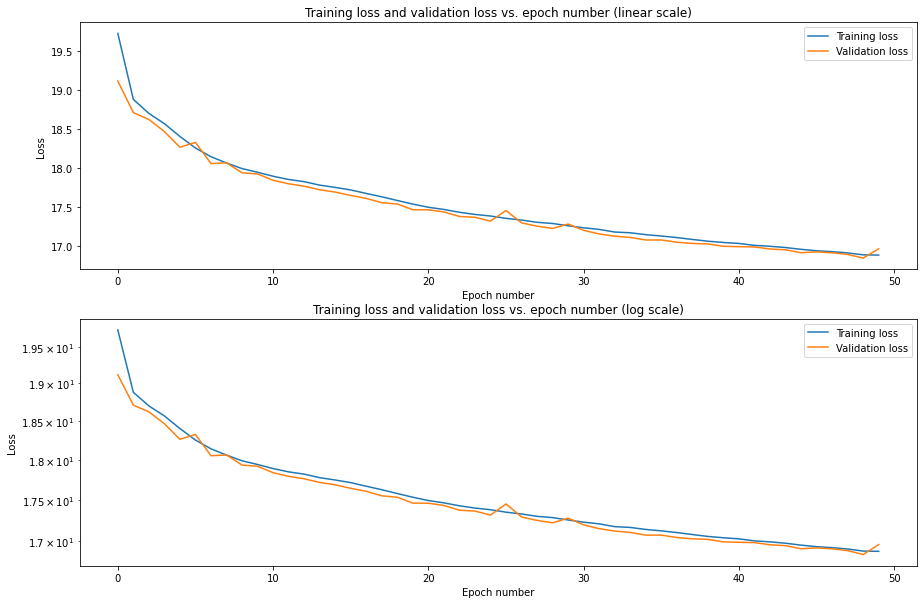

In [ ]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number
import csv

lossDataFromCSV = []
vallossDataFromCSV = []

with open('QC/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[1]))
        vallossDataFromCSV.append(float(row[2]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/lossCurvePlots.png')
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map** 

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**


In [ ]:
#@markdown

from warnings import warn
import numpy as np
from scipy.ndimage import uniform_filter, gaussian_filter

#from ..util.dtype import dtype_range
#from ..util.arraycrop import crop
#from .._shared.utils import warn, check_shape_equality

__all__ = ['structural_similarity']


def structural_similarity(im1, im2,
                          *,
                          win_size=None, gradient=False, data_range=None,
                          multichannel=False, gaussian_weights=False,
                          full=False, **kwargs):
    """
    Compute the mean structural similarity index between two images.

    Parameters
    ----------
    im1, im2 : ndarray
        Images. Any dimensionality with same shape.
    win_size : int or None, optional
        The side-length of the sliding window used in comparison. Must be an
        odd value. If `gaussian_weights` is True, this is ignored and the
        window size will depend on `sigma`.
    gradient : bool, optional
        If True, also return the gradient with respect to im2.
    data_range : float, optional
        The data range of the input image (distance between minimum and
        maximum possible values). By default, this is estimated from the image
        data-type.
    multichannel : bool, optional
        If True, treat the last dimension of the array as channels. Similarity
        calculations are done independently for each channel then averaged.
    gaussian_weights : bool, optional
        If True, each patch has its mean and variance spatially weighted by a
        normalized Gaussian kernel of width sigma=1.5.
    full : bool, optional
        If True, also return the full structural similarity image.

    Other Parameters
    ----------------
    use_sample_covariance : bool
        If True, normalize covariances by N-1 rather than, N where N is the
        number of pixels within the sliding window.
    K1 : float
        Algorithm parameter, K1 (small constant, see [1]_).
    K2 : float
        Algorithm parameter, K2 (small constant, see [1]_).
    sigma : float
        Standard deviation for the Gaussian when `gaussian_weights` is True.

    Returns
    -------
    mssim : float
        The mean structural similarity index over the image.
    grad : ndarray
        The gradient of the structural similarity between im1 and im2 [2]_.
        This is only returned if `gradient` is set to True.
    S : ndarray
        The full SSIM image.  This is only returned if `full` is set to True.

    Notes
    -----
    To match the implementation of Wang et. al. [1]_, set `gaussian_weights`
    to True, `sigma` to 1.5, and `use_sample_covariance` to False.

    .. versionchanged:: 0.16
        This function was renamed from ``skimage.measure.compare_ssim`` to
        ``skimage.metrics.structural_similarity``.

    References
    ----------
    .. [1] Wang, Z., Bovik, A. C., Sheikh, H. R., & Simoncelli, E. P.
       (2004). Image quality assessment: From error visibility to
       structural similarity. IEEE Transactions on Image Processing,
       13, 600-612.
       https://ece.uwaterloo.ca/~z70wang/publications/ssim.pdf,
       :DOI:`10.1109/TIP.2003.819861`

    .. [2] Avanaki, A. N. (2009). Exact global histogram specification
       optimized for structural similarity. Optical Review, 16, 613-621.
       :arxiv:`0901.0065`
       :DOI:`10.1007/s10043-009-0119-z`

    """
    check_shape_equality(im1, im2)

    if multichannel:
        # loop over channels
        args = dict(win_size=win_size,
                    gradient=gradient,
                    data_range=data_range,
                    multichannel=False,
                    gaussian_weights=gaussian_weights,
                    full=full)
        args.update(kwargs)
        nch = im1.shape[-1]
        mssim = np.empty(nch)
        if gradient:
            G = np.empty(im1.shape)
        if full:
            S = np.empty(im1.shape)
        for ch in range(nch):
            ch_result = structural_similarity(im1[..., ch],
                                              im2[..., ch], **args)
            if gradient and full:
                mssim[..., ch], G[..., ch], S[..., ch] = ch_result
            elif gradient:
                mssim[..., ch], G[..., ch] = ch_result
            elif full:
                mssim[..., ch], S[..., ch] = ch_result
            else:
                mssim[..., ch] = ch_result
        mssim = mssim.mean()
        if gradient and full:
            return mssim, G, S
        elif gradient:
            return mssim, G
        elif full:
            return mssim, S
        else:
            return mssim

    K1 = kwargs.pop('K1', 0.01)
    K2 = kwargs.pop('K2', 0.03)
    sigma = kwargs.pop('sigma', 1.5)
    if K1 < 0:
        raise ValueError("K1 must be positive")
    if K2 < 0:
        raise ValueError("K2 must be positive")
    if sigma < 0:
        raise ValueError("sigma must be positive")
    use_sample_covariance = kwargs.pop('use_sample_covariance', True)

    if gaussian_weights:
        # Set to give an 11-tap filter with the default sigma of 1.5 to match
        # Wang et. al. 2004.
        truncate = 3.5

    if win_size is None:
        if gaussian_weights:
            # set win_size used by crop to match the filter size
            r = int(truncate * sigma + 0.5)  # radius as in ndimage
            win_size = 2 * r + 1
        else:
            win_size = 7   # backwards compatibility

    if np.any((np.asarray(im1.shape) - win_size) < 0):
        raise ValueError(
            "win_size exceeds image extent.  If the input is a multichannel "
            "(color) image, set multichannel=True.")

    if not (win_size % 2 == 1):
        raise ValueError('Window size must be odd.')

    if data_range is None:
        if im1.dtype != im2.dtype:
            warn("Inputs have mismatched dtype.  Setting data_range based on "
                 "im1.dtype.", stacklevel=2)
        dmin, dmax = dtype_range[im1.dtype.type]
        data_range = dmax - dmin

    ndim = im1.ndim

    if gaussian_weights:
        filter_func = gaussian_filter
        filter_args = {'sigma': sigma, 'truncate': truncate}
    else:
        filter_func = uniform_filter
        filter_args = {'size': win_size}

    # ndimage filters need floating point data
    im1 = im1.astype(np.float64)
    im2 = im2.astype(np.float64)

    NP = win_size ** ndim

    # filter has already normalized by NP
    if use_sample_covariance:
        cov_norm = NP / (NP - 1)  # sample covariance
    else:
        cov_norm = 1.0  # population covariance to match Wang et. al. 2004

    # compute (weighted) means
    ux = filter_func(im1, **filter_args)
    uy = filter_func(im2, **filter_args)

    # compute (weighted) variances and covariances
    uxx = filter_func(im1 * im1, **filter_args)
    uyy = filter_func(im2 * im2, **filter_args)
    uxy = filter_func(im1 * im2, **filter_args)
    vx = cov_norm * (uxx - ux * ux)
    vy = cov_norm * (uyy - uy * uy)
    vxy = cov_norm * (uxy - ux * uy)

    R = data_range
    C1 = (K1 * R) ** 2
    C2 = (K2 * R) ** 2

    A1, A2, B1, B2 = ((2 * ux * uy + C1,
                       2 * vxy + C2,
                       ux ** 2 + uy ** 2 + C1,
                       vx + vy + C2))
    D = B1 * B2
    S = (A1 * A2) / D

    # to avoid edge effects will ignore filter radius strip around edges
    pad = (win_size - 1) // 2

    # compute (weighted) mean of ssim
    mssim = crop(S, pad).mean()

    if gradient:
        # The following is Eqs. 7-8 of Avanaki 2009.
        grad = filter_func(A1 / D, **filter_args) * im1
        grad += filter_func(-S / B2, **filter_args) * im2
        grad += filter_func((ux * (A2 - A1) - uy * (B2 - B1) * S) / D,
                            **filter_args)
        grad *= (2 / im1.size)

        if full:
            return mssim, grad, S
        else:
            return mssim, grad
    else:
        if full:
            return mssim, S
        else:
            return mssim


In [ ]:
%%capture
#@markdown ##Choose the folders that contain your Quality Control dataset
import shutil,random
from skimage import io
from skimage.metrics import structural_similarity

Source_QC_folder = "/content/gdrive/MyDrive/uni/TFG/URTZI_TFG/Notebooks/data/convallaria/dataset" #@param{type:"string"}
Target_QC_folder = Source_QC_folder

print("vamos a ver...")
print(QC_model_path+"/"+QC_model_name)

# Create a quality control/Prediction Folder
if os.path.exists(QC_model_path+"/"+QC_model_name+"/Prediction"):
  pass
  #shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Prediction")
else:
  os.makedirs(QC_model_path+"/"+QC_model_name+"/Prediction")

# Activate the pretrained model. 
#model_training = N2V(config=None, name=QC_model_name, basedir=QC_model_path)


# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))

print('Number of test dataset found in the folder: '+str(len(Z)))

basedir = Model_source
model_name = 'divnoising_mouse_skull_nuclei_demo'

name = glob(basedir+"/"+model_name+'_last.ckpt')[0]
vae = lightningmodel.VAELightning.load_from_checkpoint(checkpoint_path = name)
if not torch.cuda.is_available():
    raise ValueError("GPU not found, predictions will run on CPU and can be somewhat slow!")
else:
  vae.to(device)
num_samples = 10
export_results_path = "./temp" 
fraction_samples_to_export = 0
export_mmse = False 
tta = False

# Perform prediction on all datasets in the Source_QC folder
for filename in os.listdir(Source_QC_folder):
  img = imread(os.path.join(Source_QC_folder, filename)).astype(np.float32)
  #r = random.randint(0,len(img)-1)
  #img = img[r]
  #img.astype(np.float32)
  #print(img.shape)
  """
  auxobs = observation.copy()
  observation =observation.astype(np.float32)
  utils.plot_qualitative_results(observation,vae,device)
  """
  #@markdown ##Prediction options:
  predicted = utils.predict_and_save(img,vae,num_samples,device,fraction_samples_to_export,export_mmse,export_results_path,tta)
  #predicted = model_training.predict(img, axes='YX', n_tiles=(2,1))
  os.chdir(QC_model_path+"/"+QC_model_name+"/Prediction")
  io.imsave(filename, predicted[0].astype("uint16"))
  del predicted
  gc.collect()

Running QC on: 20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif


"\n#Root Squared Error between GT and Prediction\nplt.subplot(3,3,9)\n#plt.axis('off')\nplt.tick_params(\n    axis='both',      # changes apply to the x-axis and y-axis\n    which='both',      # both major and minor ticks are affected\n    bottom=False,      # ticks along the bottom edge are off\n    top=False,        # ticks along the top edge are off\n    left=False,       # ticks along the left edge are off\n    right=False,         # ticks along the right edge are off\n    labelbottom=False,\n    labelleft=False) \nimRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction[0], cmap = cmap, vmin=0, vmax=1)\nplt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)\nplt.title('Target vs. Prediction',fontsize=15)\nplt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)\nplt.savefig(full_QC_model_path+'/QC_example_data.png',bbox_inches='tight',pad_inches=0)\n"

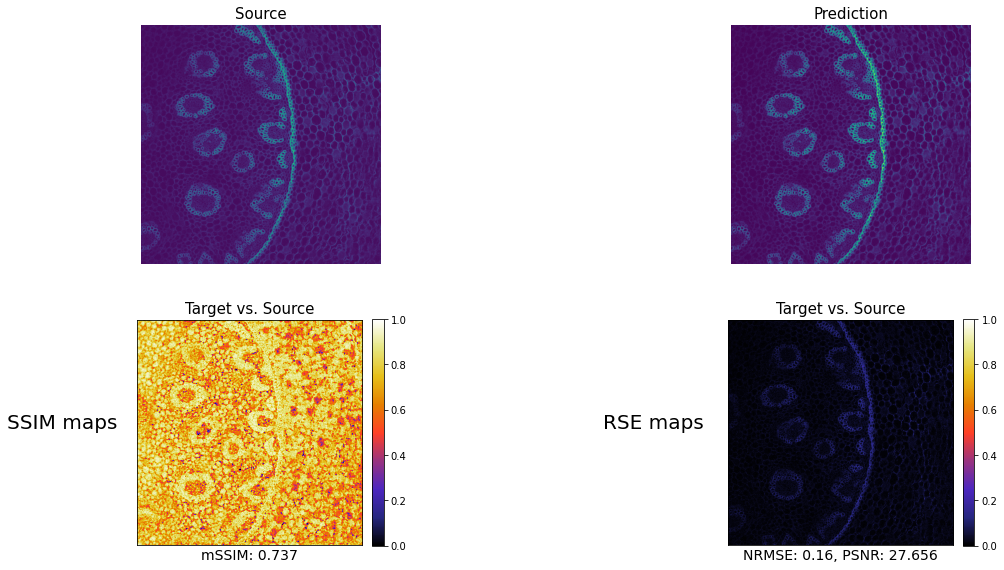

In [ ]:
#@markdown #Generate Metrics

  
def ssim(img1, img2):
  return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=True, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x

# Open and create the csv file that will contain all the QC metrics
with open("./QC_metrics_"+QC_model_name+".csv", "w+", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    #writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])  
    writer.writerow(["image #","Prediction v. Input mSSIM", "Prediction v. Input NRMSE", "Prediction v. Input PSNR"])  
    
    # Let's loop through the provided dataset in the QC folders


    for i in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder,i)):
        print('Running QC on: '+i)
      # -------------------------------- Target test data (Ground truth) --------------------------------
        #test_GT = io.imread(os.path.join(Target_QC_folder, i))

      # -------------------------------- Source test data --------------------------------
        test_source = io.imread(os.path.join(Source_QC_folder,i))
        test_source = test_source[0]

      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
        #test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source, normalize_gt=True)

      # -------------------------------- Prediction --------------------------------
        test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Prediction/", filename))
        

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
        #test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction, normalize_gt=True)
        test_prediction_norm,test_source_norm = norm_minmse(test_prediction, test_source, normalize_gt=True)        


      # -------------------------------- Calculate the metric maps and save them --------------------------------
         
      # Calculate the SSIM maps
        #index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm)
        index_SSIM_PredictionvsSource,img_SSIM_PredictionvsSource = ssim(test_prediction_norm, test_source_norm)

      #Save ssim_maps
        #img_SSIM_GTvsPrediction_32bit = np.float32(img_SSIM_GTvsPrediction)
        #io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsPrediction_'+i,img_SSIM_GTvsPrediction_32bit)
        img_SSIM_PredictionvsSource_32bit = np.float32(img_SSIM_PredictionvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/SSIM_PredictionvsSource_'+i,img_SSIM_PredictionvsSource_32bit)
        
      # Calculate the Root Squared Error (RSE) maps
        #img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        #img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))
        img_RSE_PredictionvsSource = np.sqrt(np.square(test_prediction_norm - test_source_norm))
        
      # Save SE maps
        #img_RSE_PredictionvsSource_32bit = np.float32(img_RSE_GTvsPrediction)
        img_RSE_PredictionvsSource_32bit = np.float32(img_RSE_PredictionvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/RSE_PredictionvsSource_'+i,img_RSE_PredictionvsSource_32bit)
        #io.imsave(QC_model_path+'/'+QC_model_name+'/RSE_GTvsSource_'+i,img_RSE_GTvsSource_32bit)
        

      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        #NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
        NRMSE_PredictionvsSource = np.sqrt(np.mean(img_RSE_PredictionvsSource))
        
      # We can also measure the peak signal to noise ratio between the images
        #PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
        PSNR_PredictionvsSource = psnr(test_prediction_norm,test_source_norm,data_range=1.0)

        writer.writerow([i,"0",str(NRMSE_PredictionvsSource),str(PSNR_PredictionvsSource)])


# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same

plt.figure(figsize=(15,15))
# Currently only displays the last computed set, from memory
# Target (Ground-truth)
"""
plt.subplot(2,1,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
plt.imshow(img_GT[0])
plt.title('Target',fontsize=15)
"""
# Source
plt.subplot(3,3,1)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source[0])
plt.title('Source',fontsize=15)
plt.show
#Prediction
plt.subplot(3,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Prediction/", Test_FileList[-1]))
plt.imshow(img_Prediction)
plt.title('Prediction',fontsize=15)

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between Prediction and Source
plt.subplot(3,3,4)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)

imSSIM_PredictionvsSource = plt.imshow(img_SSIM_PredictionvsSource, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_PredictionvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_PredictionvsSource,3)),fontsize=14)
plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)
"""
#SSIM between GT and Prediction
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)  
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)
"""
#Root Squared Error between Predictin and Source
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_PredictionvsSource = plt.imshow(img_RSE_PredictionvsSource, cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_PredictionvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_PredictionvsSource,3))+', PSNR: '+str(round(PSNR_PredictionvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)
"""
#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction[0], cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)
plt.savefig(full_QC_model_path+'/QC_example_data.png',bbox_inches='tight',pad_inches=0)
"""

# **6. Predict**

<font size = 5> **Parameters for predicting**

<font size = 4>**`num_sample`**: Specify how many denoised samples need to be predicted for each noisy image. Also MMSE denoised estimate will be computed using these many samples. 

<font size = 4>**`export_results_path`**: You can also save the denoised results (both samples and MMSE estimate for each noisy image). Is the directory where the results should be saved.

<font size = 4>**`fraction_samples_to_export`**: you can also export the MMSE estimate and only a fraction of the samples used for computing MMSE estimate for each image by specifying the parameter. If set to $0$, none of the samples are exported and only the MMSE estimate is exported, whereas setting it to $1$ exports all samples used for computing MMSE estimate.

<font size = 4>**`export_mmse`**: If you only want to export MMSE estimate, set parameter 

<font size = 4>**`tta`**: refers to test time augmentation which may improve performance of DivNoising even further but will take ```8x``` longer to predict. This is enabled by default. If you wish to disable it, set it to ```False```.

In [ ]:
%%capture
basedir = Model_source
model_name = 'divnoising_mouse_skull_nuclei_demo'

name = glob(basedir+"/"+model_name+'_last.ckpt')[0]
vae = lightningmodel.VAELightning.load_from_checkpoint(checkpoint_path = name)
if not torch.cuda.is_available():
    raise ValueError("GPU not found, predictions will run on CPU and can be somewhat slow!")
else:
  vae.to(device)

auxobs = observation.copy()
observation =observation.astype(np.float32)
utils.plot_qualitative_results(observation,vae,device)

#@markdown ##Prediction options:
num_samples = 10 #@param {type:"integer"}#Solia estar a 1000
export_results_path = "./denoised_results" #@param {type:"string"}
fraction_samples_to_export = 0#@param {type:"integer"}
export_mmse = False #@param {type:"boolean"}
tta = False#@param {type:"boolean"}
mmse_results = utils.predict_and_save(observation,vae,num_samples,device,fraction_samples_to_export,export_mmse,export_results_path,tta)

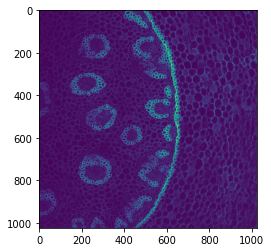

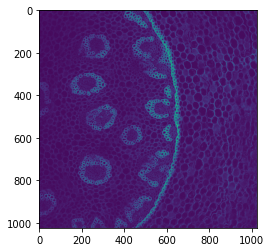

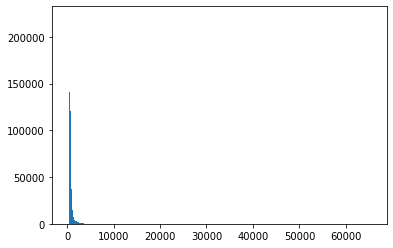

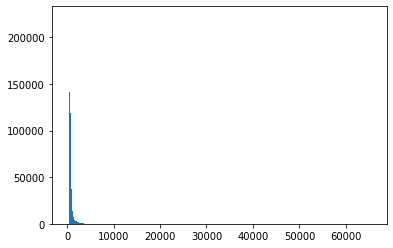

'\nimg = Image.fromarray(mmse_results[i].astype(np.int8),"L")\nimg.save(\'my.png\')\nimg.show()\n'

In [ ]:
#@markdown ##Result Visualization:
#mmse_results[i]
from skimage import io, exposure, img_as_uint, img_as_float
i = 0

plt.imshow(mmse_results[i])
plt.show()
plt.imshow(observation[i])
plt.show()

#print(mmse_results[i])
#print(observation)


# aux = mmse_results[i].astype("uint16")

# io.imsave('test_clean_16bit.png', aux)
# io.imsave('test_dirty_16bit.png', auxobs[i])

# im2 = io.imread('test_clean_16bit.png')

# plt.hist(mmse_results[i].ravel(), bins=np.linspace(0, 65536, 1000))
# plt.show()

# plt.hist(im2.ravel(), bins=np.linspace(0, 65536, 1000))
# plt.show()  
"""
img = Image.fromarray(mmse_results[i].astype(np.int8),"L")
img.save('my.png')
img.show()
"""